# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Picart, David Kyle\
_Student No._: 2022-01148\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: Nov. 30, 2024. 7:00pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** David Kyle R. Picart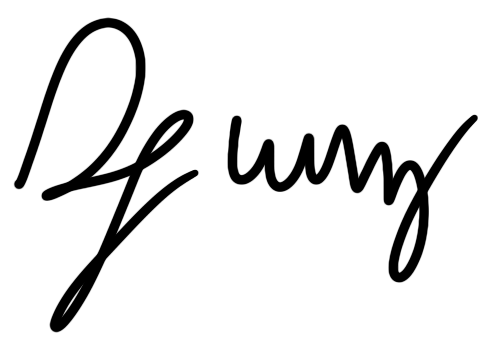

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

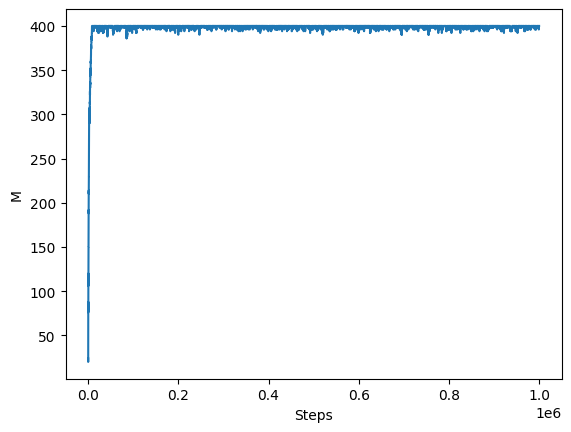

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(641)   #set seed for consistency/replicability

J = 1        #constants
T = 1
kB = 1

N = 20
steps = 1000000

A = np.random.choice([-1,1],size=[N,N])        #randomly generate 20x20 array

def E(X):
  sum = 0               #initialize sum
  for i in range(N-1):                                   #ignore edge cases, for N in an array, there are N-1 adjacent pairs
    sum += np.dot(A[i],A[i+1]) + np.dot(A[:,i],A[:,i+1])    #first term adds adjacent rows, second term adds adjacent columns
  return -J * sum        #definition of E

Ei = E(A)
M = [np.sum(A)]

for x in range(steps):
  Ei = E(A)
  a,b = np.random.randint(N), np.random.randint(N)    #generate random index numbers
  A[a][b] *= -1         #choose two random coordinates for the array, flip the sign
  Pa = min(1, np.exp((Ei-E(A))/kB/T))       #acceptance probability
  if np.random.rand() < Pa:    #acceptance condition
    M.append(np.sum(A))
  else:                #rejection condition
    A[a][b] *= -1      #revert the array
    M.append(np.sum(A))

plt.plot(M)       #plot
plt.xlabel("Steps")
plt.ylabel("M")
plt.show()

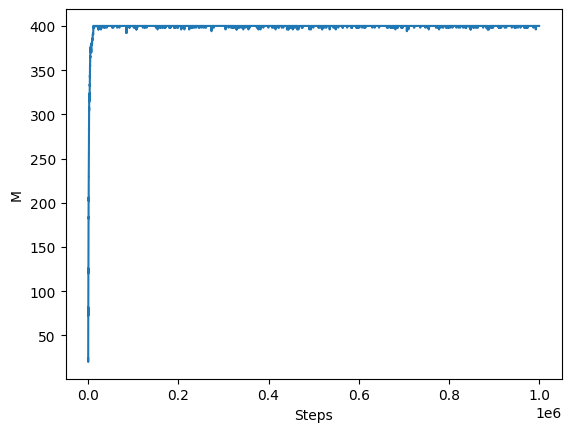

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(641)   #set seed for consistency/replicability

J = 1        #constants
T = 1
kB = 1

N = 20
steps = 1000000

A = np.random.choice([-1,1],size=[N,N])        #randomly generate 20x20 array

sum = 0               #initialize sum
for i in range(N-1):                                   #ignore edge cases, for N in an array, there are N-1 adjacent pairs
  sum += np.dot(A[i],A[i+1]) + np.dot(A[:,i],A[:,i+1])    #first term adds adjacent rows, second term adds adjacent columns
E = -J * sum        #definition of E

M = [np.sum(A)]          #initialize M list
Mp = M[0]                #initial M

for x in range(steps):
  Ei = E                 #store E from prev iteration in Ei
  a,b = np.random.randint(N), np.random.randint(N)    #generate random index numbers
  A[a][b] *= -1         #choose two random coordinates for the array, flip the sign
  dM = 2*A[a][b]        #compensate for sign change by *2 (i.e. 1-(-1) = 2*1 & -1-1 = 2*(-1))
  dE = -J * 2*A[a][b]*(A[(a+1)%N][b] + A[a][(b+1)%N] + A[(a-1)%N][b] + A[a][(b-1)%N])      #add all elements around (a,b), use mod to avoid IndexError, don't forget to mult -J
  if a == 0:                #remove extra terms from edge cases
    dE -= 2*A[a][b]*A[(a-1)%N][b]
  if a == N-1:
    dE -= 2*A[a][b]*A[(a+1)%N][b]
  if b == 0:
    dE -= 2*A[a][b]*A[a][(b-1)%N]
  if b == N-1:
    dE -= 2*A[a][b]*A[a][(b+1)%N]
  Pa = min(1, np.exp((-dE)/kB/T))       #acceptance probability; Ei-E = -dE
  if np.random.rand() < Pa:    #acceptance condition
    E += dE                   #new energy
    Mp += dM
    M.append(Mp)
  else:                #rejection condition
    A[a][b] *= -1      #revert the array
    M.append(Mp)

plt.plot(M)       #plot
plt.xlabel("Steps")
plt.ylabel("M")
plt.show()

In [ ]:
#Alternative, less efficient way to solve for E
def E(X):
  sum = 0
  for i in range(N-1):
    for j in range(N-1):
      sum += A[i][j]*(A[i][j+1] + A[i+1][j])         #add pairs oriented downward and rightward of (i,j)
  for i in range(N-1):
    sum += A[-1][i]*A[-1][i+1] + A[i][-1]*A[i+1][-1]   #add pairs along bottom and right edge
  return -J * sum

Here I used two methods to simulate the Ising model. \\
1.   The first one is simpler in human terms, reusing the same summation function for E and M, but this is very inefficient for the computer as it has to take the dot product of two 1x20 arrays 38 times per step, totaling to ~800,000,000 array elements per run. One run with 1,000,000 steps takes about 3min. \\
2.   The second one is more complicated to read, but much simpler for the computer. Instead of evaluating E & M of the whole system everytime, it only examines the neighborhood around the flipped element, only 4 paired products per step, totaling to ~8,000,000 elements per run (ignoring many other operations). One run with 1,000,000 steps takes about 15s. A huge improvement. \\

As the graphs show at $T=1, M_{total} →\pm 400$, which is the total number of elements, implying they are almost all at 1 (for M -> 400). The seed determines whether it goes positive or negative. The small fluctuations about the stable point is because there is still a likelihood of acceptance given by the formula for $P_a$, even if the energy increases.

Physically, this result shows that at very low temperatures given enough time and under very stable conditions without external contributions, the model predicts that any lattice made of polar molecules will eventually completely magnetize. The fluctuations are analogous to spontaneous flipping due to kinetic energy from the temperature.

Increasing the temperature makes the plot much more erratic, sometimes flipping signs completely, depending on the seed (for high enough temperatures around >5, the M doesnt seem to stabilize to $\pm 400$ anymore.). Though the initial state definitely influences where the plot might tend towards, it is mostly dependent on the random number generator in the $P_a$ line. A nice way to visualize it is that any point along the curve can be thought of as an "initial state"; the closer the M is to one of the stable values, the more it will tend towards that value. For a setup where the $M_i \approx 0$ and T is in the order of 1, it does not depend much on the initial state. The exception to this is for low temperatures, the initial state highly dictates which sign the final state will be (i.e. the initial sign of M will almost certainly be the final sign of M).